In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from pathlib import Path
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
#from scipy.signal import sosfiltfilt, butter
from dtw import dtw
#from dtaidistance import dtw_visualisation as dtwvis


import sys
sys.path.append("../src")
from fast_open_data import open_data_filter
from data_conversions import transition_matrix, sep_modo

In [244]:
S_ref, R_ref, L_ref = open_data_filter(52, key = 'S1_Synched')
S_alvo, R_alvo, L_alvo = open_data_filter(85, key = 'S1_Synched')

In [245]:
freq_amostragem = 120
# Criando vetor de tempo
t_ref = np.linspace(0, len(R_ref) / freq_amostragem, len(R_ref))
t_alvo = np.linspace(0, len(R_alvo) / freq_amostragem, len(R_alvo))

In [246]:
''' Usando a função fastdtw '''

# Aplicando as transformações do DTW para pescoço, perna direita e perna esquerda
distance_R, paths_R = fastdtw(R_ref, R_alvo, radius=1, dist=euclidean)
print('Perna Direita OK!')
distance_L, paths_L = fastdtw(L_ref, L_alvo, radius=1, dist=euclidean)
print('Perna Esquerda OK!')
distance_S, paths_S = fastdtw(S_ref, S_alvo, radius=1, dist=euclidean)
print('Tronco OK!')


paths_S = np.array(paths_S)
paths_R = np.array(paths_R)
paths_L = np.array(paths_L)

Perna Direita OK!
Perna Esquerda OK!
Tronco OK!


In [247]:
estimated_L = [ 100, 320, 605, 790]
estimated_R = [ 30, 320, 605, 740]
estimated_S = [ 145, 263, 365, 570, 647, 751]

In [248]:
est_S = []
for i in estimated_S:
    idx = np.where(paths_S[:,0]==i)    
    est_S.append(int(np.mean(paths_S[idx,1])))
if est_S[2] == est_S[3]:
    est_S[2] = est_S[2]-2
    est_S[3] = est_S[3]+2

print(est_S) 

est_L = []
for i in estimated_L:
    idx = np.where(paths_L[:,0]==i)    
    est_L.append(int(np.mean(paths_L[idx,1])))
        
print(est_L)

est_R = []
for i in estimated_R:
    idx = np.where(paths_R[:,0]==i)    
    est_R.append(int(np.mean(paths_R[idx,1])))
        
print(est_R)

[85, 509, 701, 705, 903, 961]
[64, 684, 800, 1220]
[235, 716, 858, 989]


In [249]:
est_ref_R = estimated_R
est_ref_L = estimated_L
est_ref_S = estimated_S 

est_alvo_S = est_S
est_alvo_L = est_L
est_alvo_R = est_R

sequence_SL =  [ 1, 2, 3, 4]
class_SL = np.unique(sequence_SL)
print(est_alvo_S)
print(est_alvo_R)
print(est_alvo_L)

[85, 509, 701, 705, 903, 961]
[235, 716, 858, 989]
[64, 684, 800, 1220]


In [250]:
sep_ref = int((est_ref_S[2] + est_ref_S[3])/2)
sep_alvo = int((est_alvo_S[2] + est_alvo_S[3])/2)

estimated_sit_ref_SL = np.array([max(est_ref_S[0], est_ref_L[0]), est_ref_S[1], est_ref_S[2]])
estimated_sit_ref_SL = np.sort(estimated_sit_ref_SL)
S_sit_ref = S_ref[:sep_ref]
L_sit_ref = L_ref[:sep_ref]
R_sit_ref = R_ref[:sep_ref]

estimated_sit_alvo_SL = np.array([max(est_alvo_S[0], est_alvo_R[0]), est_alvo_S[1], est_alvo_S[2]])
estimated_sit_alvo_SL = np.sort(estimated_sit_alvo_SL)
S_sit_alvo = S_alvo[:sep_alvo]
L_sit_alvo = L_alvo[:sep_alvo]
R_sit_alvo = R_alvo[:sep_alvo]
print(sep_alvo)

703


In [251]:
modo_sit_ref_SL, _, _, _, _ = sep_modo(S_sit_ref, estimated_sit_ref_SL, sequence_SL, class_SL)
modo_sit_alvo_SL, _, _, _, _ = sep_modo(S_sit_alvo, estimated_sit_alvo_SL, sequence_SL, class_SL)

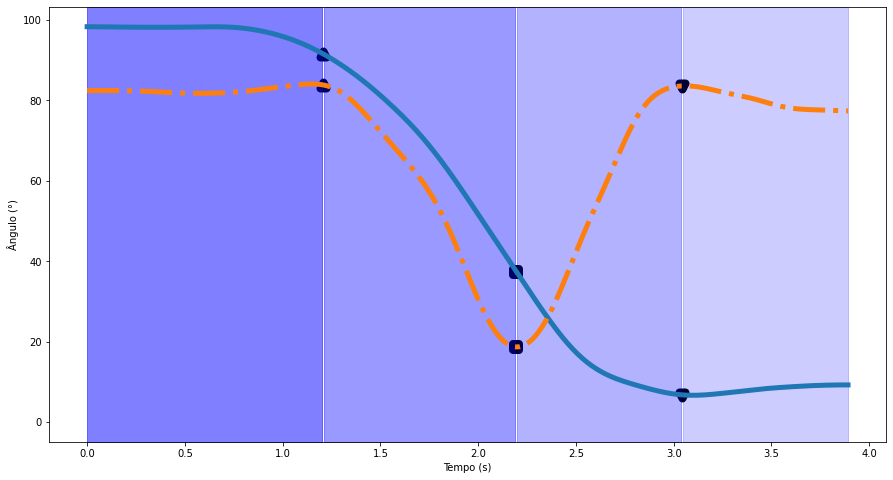

In [252]:
t_sit_ref = np.linspace(0, len(S_sit_ref) / 120, len(S_sit_ref))
#t1_sit = np.linspace(0, len(S1[:500]) / 120, len(S1[:500]))

markers=['^', 's', 'v', 'D', 'p', 'h', '8', 'P', '*', 'x']

rowing_phases_leg = ['Dobrar Perna Sentar', 'Perna Dobrada', 'Esticar Perna Levantar', 'Perna Esticada']
rowing_phases_spine = ['Inclinar Tronco Sentar', 'Inclinação Máxima do Tronco', 'Sentado Estabilizado', 
                        'Inclinar Tronco Levantar', 'Inclinação Máxima Levantar', 'Em Pé Estabilizado ']
cores = ['k', 'y', 'r', 'c', 'm', 'w', 'b', 'g', 'peru', 'cyan']

fig, ax1 = plt.subplots(1, 1, sharex=True, figsize=[15,8])
ax1.plot(t_sit_ref, L_sit_ref, label='Perna esquerda filtrada em 0,7 Hz', 
         linewidth=5)
ax1.plot(t_sit_ref, S_sit_ref, label='Tronco filtrado em 1,3 Hz', 
         linestyle='-.', linewidth=5)

k = 4
for i in range(len(estimated_sit_ref_SL)):    
    ax1.scatter(estimated_sit_ref_SL[i]/(np.array(freq_amostragem)), L_sit_ref[estimated_sit_ref_SL[i]], 
            marker=markers[i], color='black', linewidth=8)
    ax1.scatter(estimated_sit_ref_SL[i]/(np.array(freq_amostragem)), S_sit_ref[estimated_sit_ref_SL[i]], 
            marker=markers[i], color='black', linewidth=8)
    
    threshold = sequence_SL[i]
    ax1.fill_between(t_sit_ref, 0, 1, where=modo_sit_ref_SL == threshold,
                color=(0, 0, 1, 1), alpha=((0.1 * k)+0.1), transform=ax1.get_xaxis_transform())
    if i == len(estimated_sit_ref_SL)-1:
        k-=1
        threshold +=1
        ax1.fill_between(t_sit_ref, 0, 1, where=modo_sit_ref_SL == threshold,
                color=(0, 0, 1, 1), alpha=((0.1 * k)+0.1), transform=ax1.get_xaxis_transform())
    k -= 1


#plt.title('Fases do DTW para sentar e levantar')
#plt.legend()
plt.ylabel('Ângulo (°)')
plt.xlabel('Tempo (s)')
plt.grid(False)
plt.axis(True)
#plt.grid()
#fig.tight_layout()
#plt.savefig(f_name + 'Fases do DTW para tronco e perna esquerda.png')
plt.show()

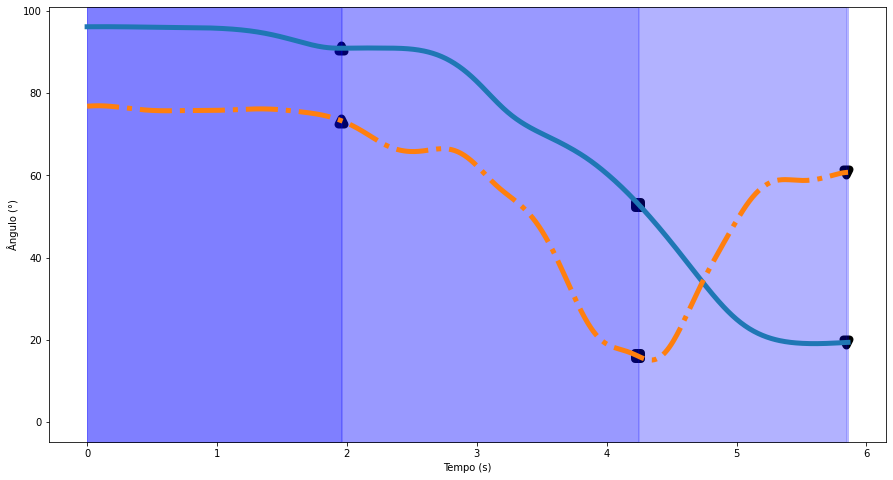

In [253]:
t_sit_alvo = np.linspace(0, len(S_sit_alvo) / 120, len(S_sit_alvo))
#t1_sit = np.linspace(0, len(S1[:500]) / 120, len(S1[:500]))

markers=['^', 's', 'v', 'D', 'p', 'h', '8', 'P', '*', 'x']

rowing_phases_leg = ['Dobrar Perna Sentar', 'Perna Dobrada', 'Esticar Perna Levantar', 'Perna Esticada']
rowing_phases_spine = ['Inclinar Tronco Sentar', 'Inclinação Máxima do Tronco', 'Sentado Estabilizado', 
                        'Inclinar Tronco Levantar', 'Inclinação Máxima Levantar', 'Em Pé Estabilizado ']
cores = ['k', 'y', 'r', 'c', 'm', 'w', 'b', 'g', 'peru', 'cyan']

fig, ax1 = plt.subplots(1, 1, sharex=True, figsize=[15,8])
ax1.plot(t_sit_alvo, L_sit_alvo, label='Perna esquerda filtrada em 0,7 Hz', 
         linewidth=5)
ax1.plot(t_sit_alvo, S_sit_alvo, label='Tronco filtrado em 1,3 Hz', 
         linestyle='-.', linewidth=5)

k = 4
for i in range(len(estimated_sit_alvo_SL)):    
    ax1.scatter(estimated_sit_alvo_SL[i]/(np.array(freq_amostragem)), L_sit_alvo[estimated_sit_alvo_SL[i]], 
            marker=markers[i], color='black', linewidth=8)
    ax1.scatter(estimated_sit_alvo_SL[i]/(np.array(freq_amostragem)), S_sit_alvo[estimated_sit_alvo_SL[i]], 
            marker=markers[i], color='black', linewidth=8)
    
    threshold = sequence_SL[i]
    ax1.fill_between(t_sit_alvo, 0, 1, where=modo_sit_alvo_SL == threshold,
                color=(0, 0, 1, 1), alpha=((0.1 * k)+0.1), transform=ax1.get_xaxis_transform())
    if i == len(estimated_sit_alvo_SL)-1:
        k -= 1
        threshold +=1
        ax1.fill_between(t_sit_alvo, 0, 1, where=modo_sit_alvo_SL == threshold,
                color=(0, 0, 1, 1), alpha=((0.1 * k)+0.1), transform=ax1.get_xaxis_transform())
    k -= 1


#plt.title('Fases do DTW para sentar e levantar')
#plt.legend()
plt.ylabel('Ângulo (°)')
plt.xlabel('Tempo (s)')
plt.grid(False)
plt.axis(True)
#plt.grid()
#fig.tight_layout()
#plt.savefig(f_name + 'alvo_dtw_sentar.png')
plt.show()

In [254]:
estimated_rise_ref_SL = np.array([est_ref_S[3]-sep_ref, est_ref_S[4]-sep_ref, 
                     max(est_ref_S[5], est_ref_L[3])-sep_ref])
estimated_rise_ref_SL = np.short(estimated_rise_ref_SL)

S_rise_ref = S_ref[sep_ref:]
L_rise_ref = L_ref[sep_ref:]
R_rise_ref = R_ref[sep_ref:]

estimated_rise_alvo_SL = np.array([est_alvo_S[3]-sep_alvo, est_alvo_S[4]-sep_alvo, 
                              min(est_alvo_S[5], est_alvo_R[3])-sep_alvo])
estimated_rise_alvo_SL = np.sort(estimated_rise_alvo_SL)

S_rise_alvo = S_alvo[sep_alvo:]
L_rise_alvo = L_alvo[sep_alvo:]
R_rise_alvo = R_alvo[sep_alvo:]

In [255]:
modo_rise_ref_SL, _, _, _, _ = sep_modo(S_rise_ref, estimated_rise_ref_SL, sequence_SL, class_SL)
modo_rise_alvo_SL, _, _, _, _ = sep_modo(S_rise_alvo, estimated_rise_alvo_SL, sequence_SL, class_SL)

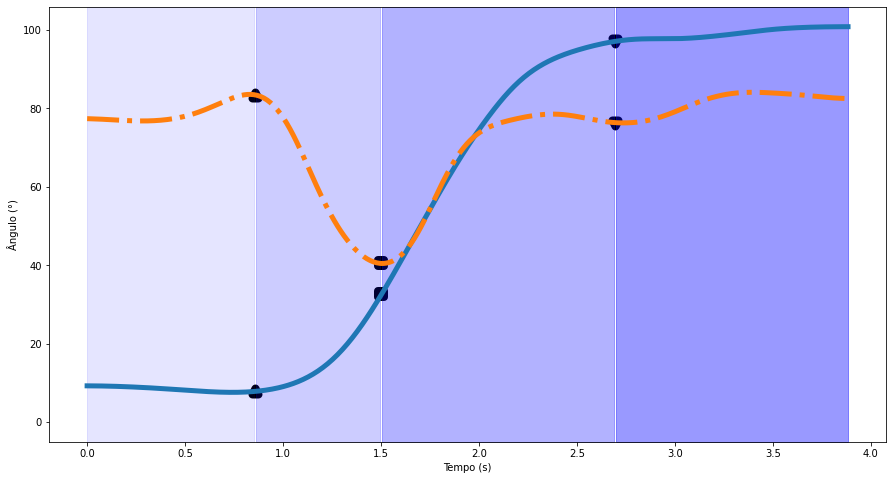

In [256]:
t_rise_ref = np.linspace(0, len(S_rise_ref) / 120, len(S_rise_ref))

fig, ax1 = plt.subplots(1, 1, sharex=True, figsize=[15,8])
ax1.plot(t_rise_ref, L_rise_ref, label='Perna esquerda filtrada em 0,7 Hz', 
         linewidth=5)
ax1.plot(t_rise_ref, S_rise_ref, label='Tronco filtrado em 1,3 Hz', 
         linestyle='-.', linewidth=5)

for i in range(len(estimated_rise_ref_SL)):    
    ax1.scatter(estimated_rise_ref_SL[i]/(np.array(freq_amostragem)), L_rise_ref[estimated_rise_ref_SL[i]], 
            marker=markers[i], color='black', linewidth=8)
    ax1.scatter(estimated_rise_ref_SL[i]/(np.array(freq_amostragem)), S_rise_ref[estimated_rise_ref_SL[i]], 
            marker=markers[i], color='black', linewidth=8)
    
    threshold = sequence_SL[i]
    ax1.fill_between(t_rise_ref, 0, 1, where=modo_rise_ref_SL == threshold,
                color=(0, 0, 1, 1), alpha=((0.1 * i)+0.1), transform=ax1.get_xaxis_transform())
    if i == len(estimated_rise_ref_SL)-1:
        i+=1
        threshold +=1
        ax1.fill_between(t_rise_ref, 0, 1, where=modo_rise_ref_SL == threshold,
                color=(0, 0, 1, 1), alpha=((0.1 * i)+0.1), transform=ax1.get_xaxis_transform())


#plt.title('Fases do DTW para sentar e levantar')
#plt.legend()
plt.ylabel('Ângulo (°)')
plt.xlabel('Tempo (s)')
plt.grid(False)
plt.axis(True)
#plt.grid()
#fig.tight_layout()
#plt.savefig(f_name + 'Fases do DTW para tronco e perna esquerda.png')
plt.show()

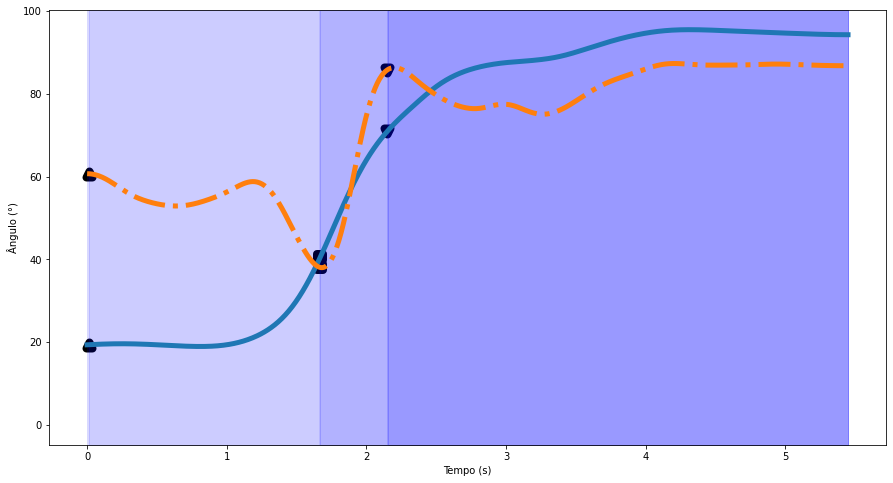

In [257]:
t_rise_alvo = np.linspace(0, len(S_rise_alvo) / 120, len(S_rise_alvo))

fig, ax1 = plt.subplots(1, 1, sharex=True, figsize=[15,8])
ax1.plot(t_rise_alvo, L_rise_alvo, label='Perna esquerda filtrada em 0,7 Hz', 
         linewidth=5)
ax1.plot(t_rise_alvo, S_rise_alvo, label='Tronco filtrado em 1,3 Hz', 
         linestyle='-.', linewidth=5)

for i in range(len(estimated_rise_alvo_SL)):    
    ax1.scatter(estimated_rise_alvo_SL[i]/(np.array(freq_amostragem)), L_rise_alvo[estimated_rise_alvo_SL[i]], 
            marker=markers[i], color='black', linewidth=8)
    ax1.scatter(estimated_rise_alvo_SL[i]/(np.array(freq_amostragem)), S_rise_alvo[estimated_rise_alvo_SL[i]], 
            marker=markers[i], color='black', linewidth=8)
    
    threshold = sequence_SL[i]
    ax1.fill_between(t_rise_alvo, 0, 1, where=modo_rise_alvo_SL == threshold,
                color=(0, 0, 1, 1), alpha=((0.1 * i)+0.1), transform=ax1.get_xaxis_transform())
    if i == len(estimated_rise_alvo_SL)-1:
        i+=1
        threshold +=1
        ax1.fill_between(t_rise_alvo, 0, 1, where=modo_rise_alvo_SL == threshold,
                color=(0, 0, 1, 1), alpha=((0.1 * i)+0.1), transform=ax1.get_xaxis_transform())


#plt.title('Fases do DTW para sentar e levantar')
#plt.legend()
plt.ylabel('Ângulo (°)')
plt.xlabel('Tempo (s)')
plt.grid(False)
plt.axis(True)
#plt.grid()
#fig.tight_layout()
#plt.savefig(f_name + 'alvo_dtw_levantar.png')
plt.show()

# Usando a função DTW

In [48]:
from dtw import dtw

In [49]:
def plot_dtw(ref_data, data, title = 'None'):
    f_name = 'C:/Users/User/OneDrive/TCC/ema_motion_analysis_imu/Imagens/'
    
    manhattan_distance = lambda ref_data, data: np.abs(ref_data - data)
    d, cost_matrix, acc_cost_matrix, path = dtw(ref_data, data, dist=manhattan_distance)
    
    plt.imshow(acc_cost_matrix.T, origin='lower', cmap='Blues', interpolation='nearest')
    plt.plot(path[0], path[1], 'black')
    plt.clim([0, np.max(acc_cost_matrix)])
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Referência')
    plt.ylabel('Alvo')
    plt.grid()
    #plt.savefig(f_name + title +'.png')
    plt.show()
    
    return path

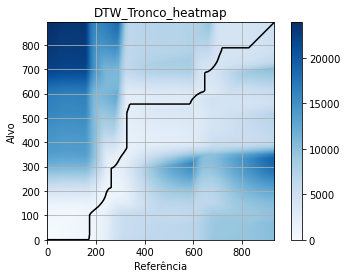

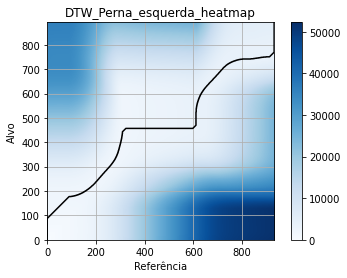

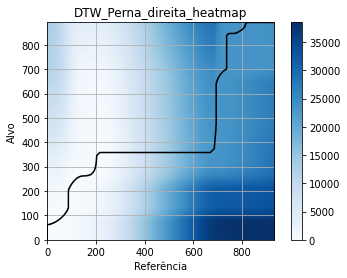

In [50]:
path_S = plot_dtw(S_ref, S_alvo, title = 'DTW_Tronco_heatmap')
path_L = plot_dtw(L_ref, L_alvo, title = 'DTW_Perna_esquerda_heatmap')
path_R = plot_dtw(R_ref, R_alvo, title = 'DTW_Perna_direita_heatmap')

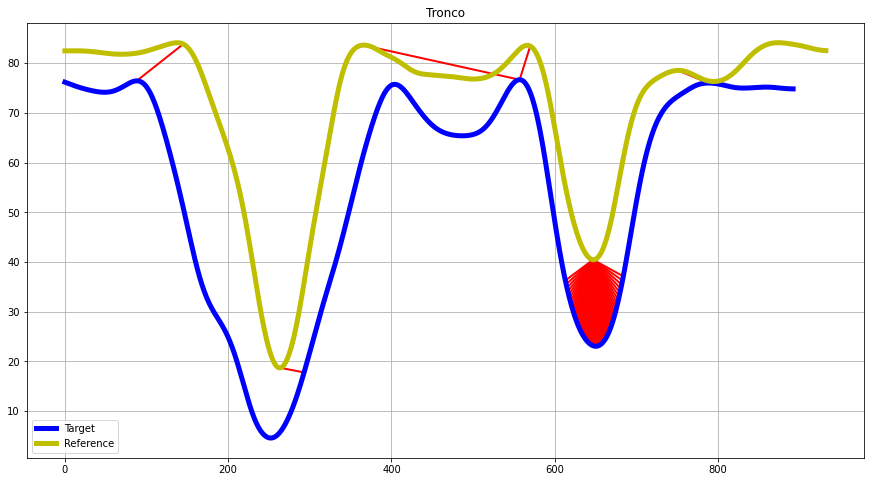

In [51]:
k = 0
est_S = []
plt.figure(figsize=[15,8])
for i in range(len(paths_S[:, 0])):
    if paths_S[i, 0] == estimated_S[k]:
        if est_S == []:
            est_S.append(paths_S[i, 1])
        if (abs(est_S[-1] - paths_S[i, 1])) >= 5:
            est_S.append(paths_S[i, 1])
                        
        
        if paths_S[i + 1, 0] == estimated_S[k]:
            pass
        else:
            k = k + 1
            
        plt.plot([paths_S[i, 0], paths_S[i, 1]], 
                 ([S_ref[paths_S[i,0]], 
                 S_alvo[paths_S[i,1]]]), 'r', linewidth=2)
    if k == 6:
        k = 0

est_S = np.array(est_S)
est_S = np.unique(est_S)
        
plt.plot(S_alvo, color = 'b', label = 'Target', linewidth=5)
plt.plot(S_ref, color = 'y',  label = 'Reference', linewidth=5)
plt.title('Tronco')
plt.legend()
plt.grid(True)
plt.axis(True)
plt.show()

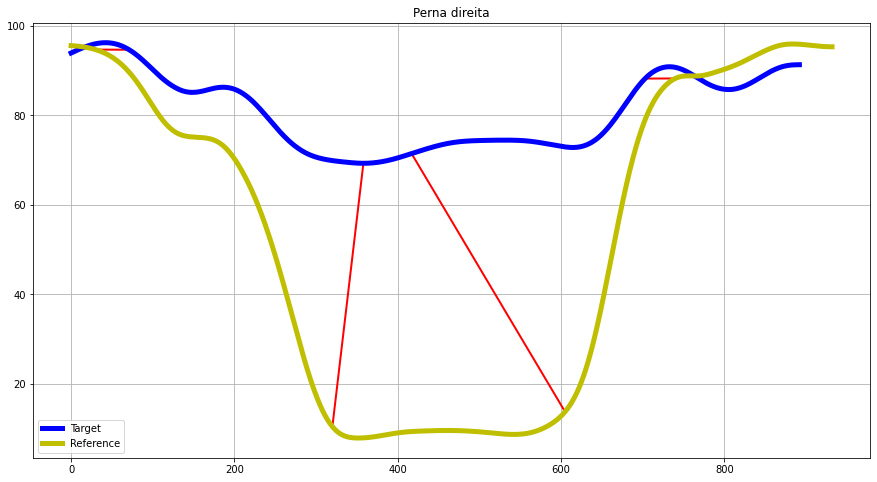

In [52]:
k = 0
est_R = []
plt.figure(figsize=[15,8])
for i in range(len(paths_R[:, 0])):
    if paths_R[i, 0] == estimated_R[k]:
        if est_R == []:
            est_R.append(paths_R[i, 1])
        if (abs(est_R[-1] - paths_R[i, 1])) >= 5:
            est_R.append(paths_R[i, 1])
                        
        if paths_R[i + 1, 0] == estimated_R[k]:
            pass
        else:
            k = k + 1
            
        plt.plot([paths_R[i, 0], paths_R[i, 1]], 
                 ([R_ref[paths_R[i,0]], 
                 R_alvo[paths_R[i,1]]]), 'r', linewidth=2)
    if k == 4:
        k = 0

est_R = np.array(est_R)
est_R = np.unique(est_R)

plt.plot(R_alvo, color = 'b', label = 'Target', linewidth=5)
plt.plot(R_ref, color = 'y',  label = 'Reference', linewidth=5)
plt.title('Perna direita')
plt.legend()
plt.grid(True)
plt.axis(True)
plt.show()

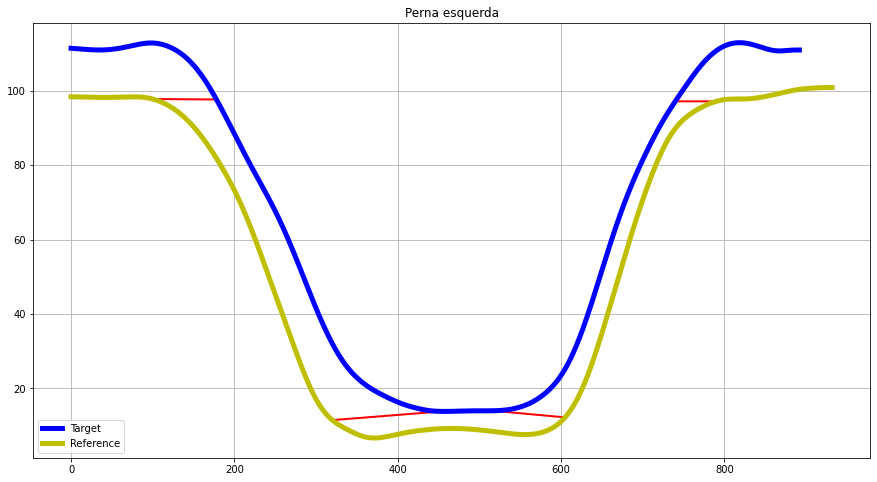

In [53]:
k = 0
est_L = []
plt.figure(figsize=[15,8])
for i in range(len(paths_L[:, 0])):
    if paths_L[i, 0] == estimated_L[k]:
        if est_L == []:
            est_L.append(paths_L[i, 1])
        if (abs(est_L[-1] - paths_L[i, 1])) >= 5:
            est_L.append(paths_L[i, 1])
                        
        if paths_L[i + 1, 0] == estimated_L[k]:
            pass
        else:
            k = k + 1
            
        plt.plot([paths_L[i, 0], paths_L[i, 1]], 
                 ([L_ref[paths_L[i,0]], 
                 L_alvo[paths_L[i,1]]]), 'r', linewidth=2)
    if k == 4:
        k = 0

est_L = np.array(est_L)
est_L = np.unique(est_L)
        
plt.plot(L_alvo, color = 'b', label = 'Target', linewidth=5)
plt.plot(L_ref, color = 'y',  label = 'Reference', linewidth=5)
plt.title('Perna esquerda')
plt.legend()
plt.grid(True)
plt.axis(True)
plt.show()

In [54]:
est_ref_R = estimated_R
est_ref_L = estimated_L
est_ref_S = estimated_S 

est_alvo_S = est_S
est_alvo_L = est_L
est_alvo_R = est_R

sequence_SL =  [ 1, 2, 3, 4, 5]
class_SL = np.unique(sequence_SL)

In [55]:
sep_ref = int((est_ref_S[2] + est_ref_S[3])/2)
sep_alvo = int((est_alvo_S[2] + est_alvo_S[3])/2)

estimated_sit_ref_SL = np.array([max(est_ref_S[0], est_ref_L[0]), est_ref_S[1], est_ref_L[1], est_ref_S[2]])
estimated_sit_ref_SL = np.sort(estimated_sit_ref_SL)
S_sit_ref = S_ref[:sep_ref]
L_sit_ref = L_ref[:sep_ref]
R_sit_ref = R_ref[:sep_ref]

estimated_sit_alvo_SL = np.array([max(est_alvo_S[0], est_alvo_R[0]), est_alvo_S[1], est_alvo_R[1], est_alvo_S[2]])
estimated_sit_alvo_SL = np.sort(estimated_sit_alvo_SL)
S_sit_alvo = S_alvo[:sep_alvo]
L_sit_alvo = L_alvo[:sep_alvo]
R_sit_alvo = R_alvo[:sep_alvo]

In [56]:
modo_sit_ref_SL, _, _, _, _ = sep_modo(S_sit_ref, estimated_sit_ref_SL, sequence_SL, class_SL)
modo_sit_alvo_SL, _, _, _, _ = sep_modo(S_sit_alvo, estimated_sit_alvo_SL, sequence_SL, class_SL)

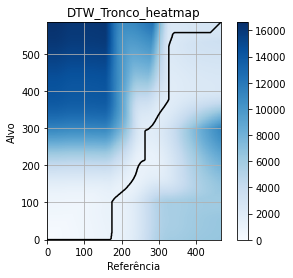

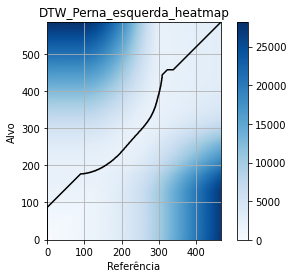

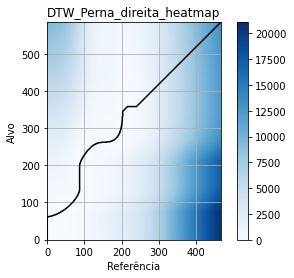

In [57]:
path_S = plot_dtw(S_sit_ref, S_sit_alvo, title = 'DTW_Tronco_heatmap')
path_L = plot_dtw(L_sit_ref, L_sit_alvo, title = 'DTW_Perna_esquerda_heatmap')
path_R = plot_dtw(R_sit_ref, R_sit_alvo, title = 'DTW_Perna_direita_heatmap')

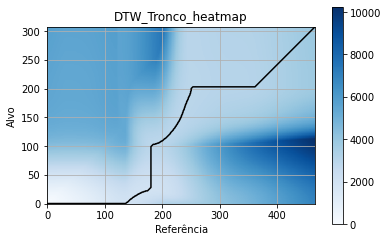

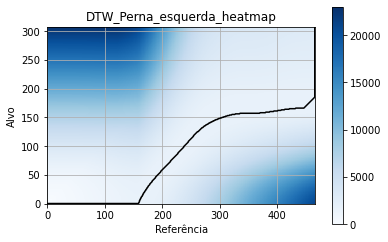

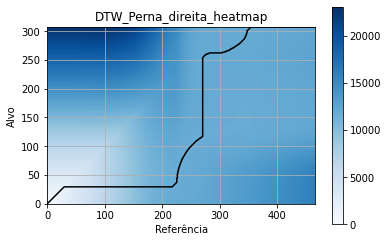

In [58]:
path_S = plot_dtw(S_rise_ref, S_rise_alvo, title = 'DTW_Tronco_heatmap')
path_L = plot_dtw(L_rise_ref, L_rise_alvo, title = 'DTW_Perna_esquerda_heatmap')
path_R = plot_dtw(R_rise_ref, R_rise_alvo, title = 'DTW_Perna_direita_heatmap')